# Mustererkennung/Machine Learning - Assignment 8



In [307]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [308]:
class Classifier:
    
    def accuracy(self, labels, predictions):
        return np.mean(labels == predictions)


data = pd.read_csv("../data/iris.csv", header=None)
data.head(n=5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### Splitting the data into training/test and according to their class memberships

In [309]:
X_train, X_test, y_train, y_test = train_test_split(data[list(range(4))], data[4], test_size=0.33, random_state=42, stratify=None)

X_train_setosa = X_train[y_train=='Setosa'].to_numpy()
X_train_versicolor = X_train[y_train=='Versicolor'].to_numpy()
X_train_virginica = X_train[y_train=='Virginica'].to_numpy()

X_test_setosa_v_v = X_test.to_numpy()
y_test_setosa_v_v = (y_test == 'Setosa').astype(int).to_numpy()

X_test_versicolor_virginica = X_test[y_test!='Setosa'].to_numpy()
y_test_versicolor_virginica = (y_test[y_test!='Setosa'] == 'Versicolor').astype(int).to_numpy()

In [310]:
print(X_train)

       0    1    2    3
96   5.7  2.9  4.2  1.3
105  7.6  3.0  6.6  2.1
66   5.6  3.0  4.5  1.5
0    5.1  3.5  1.4  0.2
122  7.7  2.8  6.7  2.0
..   ...  ...  ...  ...
71   6.1  2.8  4.0  1.3
106  4.9  2.5  4.5  1.7
14   5.8  4.0  1.2  0.2
92   5.8  2.6  4.0  1.2
102  7.1  3.0  5.9  2.1

[100 rows x 4 columns]


## Data Visualisation

In [311]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# Next, we extract the first 100 class labels that correspond to the 50 Iris-Setosa 
# and 50 Iris-Versicolor flowers, respectively:
y_sep_vers = df.iloc[0:100, 4].values

# The we want to convert the class labels into the two integer class labels 1 (Versicolor) and 0 (Setosa) 
# that we assign to a vector y
y_sep_vers = np.where(y_sep_vers == 'Iris-versicolor', 1, 0)
print("y_sep_vers:", y_sep_vers)

# Also, we need to extract the first feature column (sepal length) and the third feature column (petal length) 
# of those 100 training samples and assign them to a feature matrix X:
X_sep_vers = df.iloc[0:100, [0, 2]].values

#===========
y_vers_virg = df.iloc[50:150, 4].values

# The we want to convert the class labels into the two integer class labels 1 (Versicolor) and 0 (Iris-virginica) 
# that we assign to a vector y
y_vers_virg = np.where(y_vers_virg == 'Iris-versicolor', 1, 0)
print("y_vers_virg:", y_vers_virg)

# Also, we need to extract the first feature column (sepal length) and the third feature column (petal length) 
# of those 100 training samples and assign them to a feature matrix X:
X_vers_virg = df.iloc[50:150, [0, 2]].values



y_sep_vers: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
y_vers_virg: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


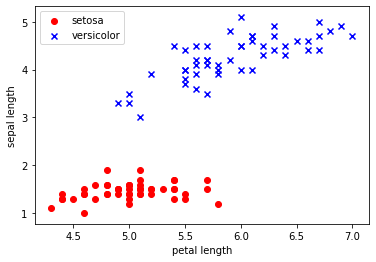

In [312]:
plt.scatter(X_sep_vers[:50, 0], X_sep_vers[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X_sep_vers[50:100, 0], X_sep_vers[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

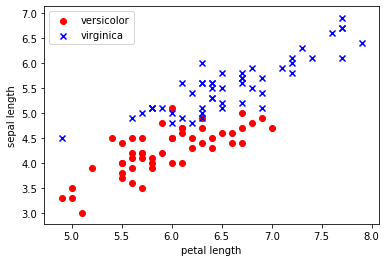

In [313]:
plt.scatter(X_vers_virg[:50, 0], X_vers_virg[:50, 1], color='red', marker='o', label='versicolor')
plt.scatter(X_vers_virg[50:100, 0], X_vers_virg[50:100, 1], color='blue', marker='x', label='virginica')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [314]:
path_to_train = '../data/zip.train'
path_to_test = '../data/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

In [319]:

class SimplePerceptron(Classifier):
    
    def fit(self, X, y, epsilon=0.001, iterations=1000):            
        w_prime = np.average(X, axis=0)
        self.data_mean = w_prime
        
        iteration = 0
        while True:
            iteration = iteration + 1
            w = w_prime
            
            rv = np.random.randint(len(X))
            v = X[rv]

            if iteration > iterations:
                break
            
            proj = w.T @ v
            if y[rv] == 1 and proj <= 0:
                w_prime = w + v
            elif y[rv] == 0 and proj >= 0:
                w_prime = w - v
            else:
                continue
                    
            dist = np.linalg.norm(w_prime-w)            
            
            if dist < epsilon: 
                break
                
        self.w = w_prime
        
    def predict(self, X):
        k = (X@self.w)
        y = np.where(k>0, 1, 0)
        return y
    
Xs = np.concatenate([X_train_setosa, 
                     X_train_versicolor,
                     X_train_virginica])

ys = np.concatenate([np.ones(len(X_train_setosa)),
                     np.zeros(len(X_train_versicolor)),
                     np.zeros(len(X_train_virginica))])

p = SimplePerceptron()
p.fit(Xs, ys)
print(p.predict(X_test_setosa_v_v))
print(p.accuracy(p.predict(X_test_setosa_v_v), y_test_setosa_v_v))


[0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0
 1 1 1 0 0 0 1 1 0 0 0 0 0]
1.0


## Excercise 2. Multilayer-Perceptron (MLP)
Implement a class that builds an MLP with both variable depth D (number of layers) andvariable number of neurons ni for each layer i= 1, ..., D.  
Produce outputs on the ZIP-Dataset

In [320]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
    
class MultilayerPerceptron(Classifier):

    def _dummy_array(self, rows, cols):
        return np.random.rand(rows, cols)
    
    def __init__(self, depth=10, layer_size=5):
        self.depth = depth
        self.layer_size = layer_size
        self.layers = [self._dummy_array(layer_size, layer_size+1) for _ in range(depth)]
    
    def fit(self, X, y, learn_rate=0.1):
        num_features = X.shape[1]
        num_outs = y.shape[1]
        
        self.input_w = self._dummy_array(self.layer_size, num_features+1)
        self.output_w = self._dummy_array(num_outs, self.layer_size+1)

    def predict(self, X):
        X_with_bias = np.r_[X, [1]]
        layer_signal = sigmoid(np.dot(self.input_w, X_with_bias))
        layer_signal = np.r_[layer_signal, [1]]

        for idx, l in enumerate(self.layers):
            layer_signal = np.tensordot(l, layer_signal, 1)
            layer_signal = sigmoid(layer_signal)
            layer_signal = np.r_[layer_signal, [1]]
            
        output = sigmoid(np.dot(self.output_w, layer_signal))
                    
        return output
    

Xs = np.concatenate([X_train_setosa, 
                     X_train_versicolor,
                     X_train_virginica])

ys = np.concatenate([np.array([[1, 0, 0]]).repeat(len(X_train_setosa), axis=0),
                     np.array([[0, 1, 0]]).repeat(len(X_train_versicolor), axis=0),
                     np.array([[0, 0, 1]]).repeat(len(X_train_virginica), axis=0),])
    
mlp = MultilayerPerceptron(depth=5, layer_size=3)
mlp.fit(Xs, ys)

pred = mlp.predict(X_test_versicolor_virginica[0])

print(pred)

[0.88105497 0.8952706  0.95045827]
